# Análise Temporal de Dados de Nascimentos - Parte 1

- **Mestrado**: Matemática Aplicada para a Indústria
- **Nome do Disciplina**: Metódos de Previsão
- **Docente**: Ana Martins
- **Alunos**: João Marques A50941 e David Silva A50198
- **Data**: 12/11/2023

---


## 1. Preparação de Dados

A escolha deste conjunto de dados teve em conta a sua adequação para análise de séries temporais. Na preparação, procedeu-se à transformação dos dados, incluindo a conversão de datas e tratamento de valores ausentes. Esta etapa é importante porque, para fazer uma análise fiável, precisamos de dados precisos e bem formatados.

#### Importação dos Dados
Os dados foram importados de uma fonte segura, assegurando a precisão e relevância para o estudo. Escolhemos o formato CSV por ser facilmente manuseável em Python, devido à sua ampla compatibilidade e conveniência com bibliotecas de análise de dados, como o Pandas. Esta escolha permite uma manipulação eficiente dos dados e facilita as etapas subsequentes de análise.

**Nota**: A fonte primária dos dados utilizados neste estudo é o Instituto Nacional de Estatística (INE). No entanto, é importante destacar que a obtenção direta dos dados foi feita através do Banco de Dados de Fertilidade Humana ([Human Fertility Database](https://www.humanfertility.org/)). O Human Fertility Database é uma fonte internacional amplamente reconhecida e utilizada por pesquisadores na área da demografia e fertilidade.

In [1]:
import pandas as pd

# Load the dataset
file_path = '../data/processed/births_PT_limpo.csv'  # Update with the actual path
births_data = pd.read_csv(file_path)
births_data['Date'] = pd.to_datetime(births_data['Date'])
births_data.set_index('Date', inplace=True)
births_data.head()


,Births
Date,
1901-01-01,15178.0
1901-02-01,15826.0
1901-03-01,14132.0
1901-04-01,16179.0
1901-05-01,15070.0


## 2. Análise Descritiva

Esta secção foca-se na aplicação de métodos estatísticos e visualizações para resumir e entender as características do conjunto de dados. Antes de mergulhar na modelação de séries temporais, é essencial ter uma compreensão clara dos dados. Os resumos estatísticos fornecem uma visão rápida das principais características, como a tendência central (média ou mediana), a variabilidade (desvio padrão) e outras estatísticas relevantes. Esta passo inicial ajuda-nos a formular hipóteses e a tomar decisões informadas sobre as escolhas de modelação.


,Births
count,1452.000000
mean,13970.406336
std,3868.502572
min,5719.000000
25%,9913.750000
50%,15313.000000
75%,17052.500000
max,22127.000000


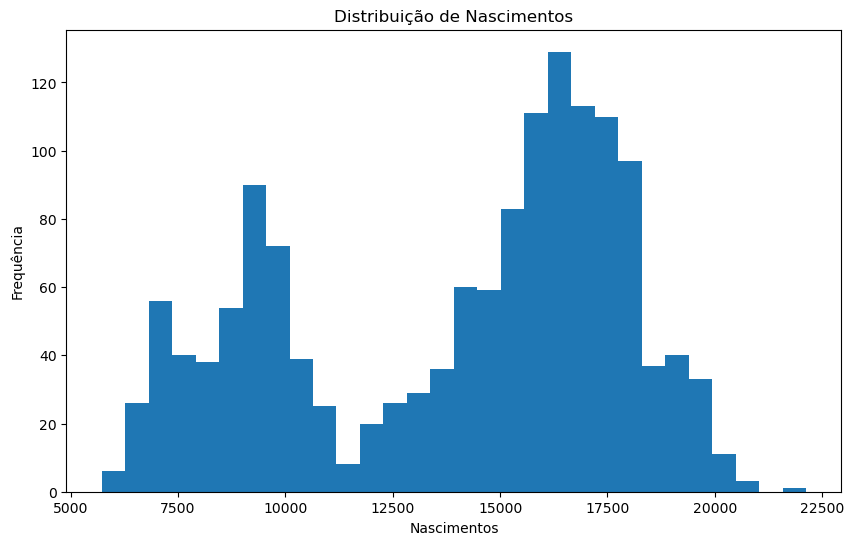

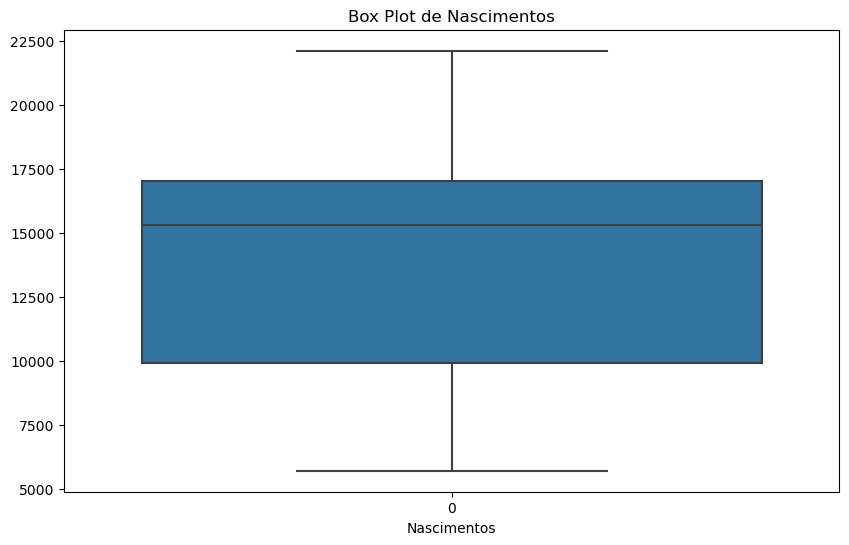

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
display(births_data.describe())

# Histogram
plt.figure(figsize=(10, 6))
plt.hist(births_data['Births'], bins=30)
plt.title('Distribuição de Nascimentos')
plt.xlabel('Nascimentos')
plt.ylabel('Frequência')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(births_data['Births'])
plt.title('Box Plot de Nascimentos')
plt.xlabel('Nascimentos')
plt.show()


## 3. Visualização de Séries Temporais & Correlograma

A análise de séries temporais beneficia imensamente da visualização e do uso de correlogramas. Estas ferramentas são vitais para entender padrões e dependências temporais nos dados.

### Visualização de Séries Temporais

- **Compreensão Rápida**: Identifica tendências, padrões sazonais e outliers.
- **Análise Exploratória**: Prepara os dados para a modelação, destacando aspectos críticos.
- **Comunicação Eficaz**: Facilita a interpretação e apresentação dos dados.

### Correlograma

- **Autocorrelação**: Revela como valores passados influenciam os atuais.
- **Modelagem Estatística**: Ajuda na escolha de modelos como o ARIMA.
- **Estacionariedade e Sazonalidade**: Ajuda a verificar pressupostos críticos e a identificar padrões cíclicos.



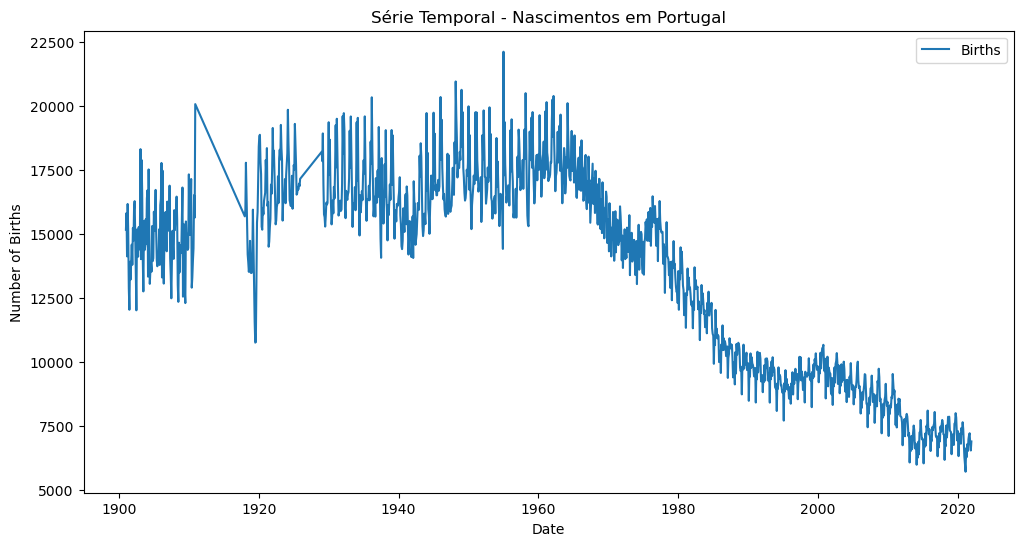

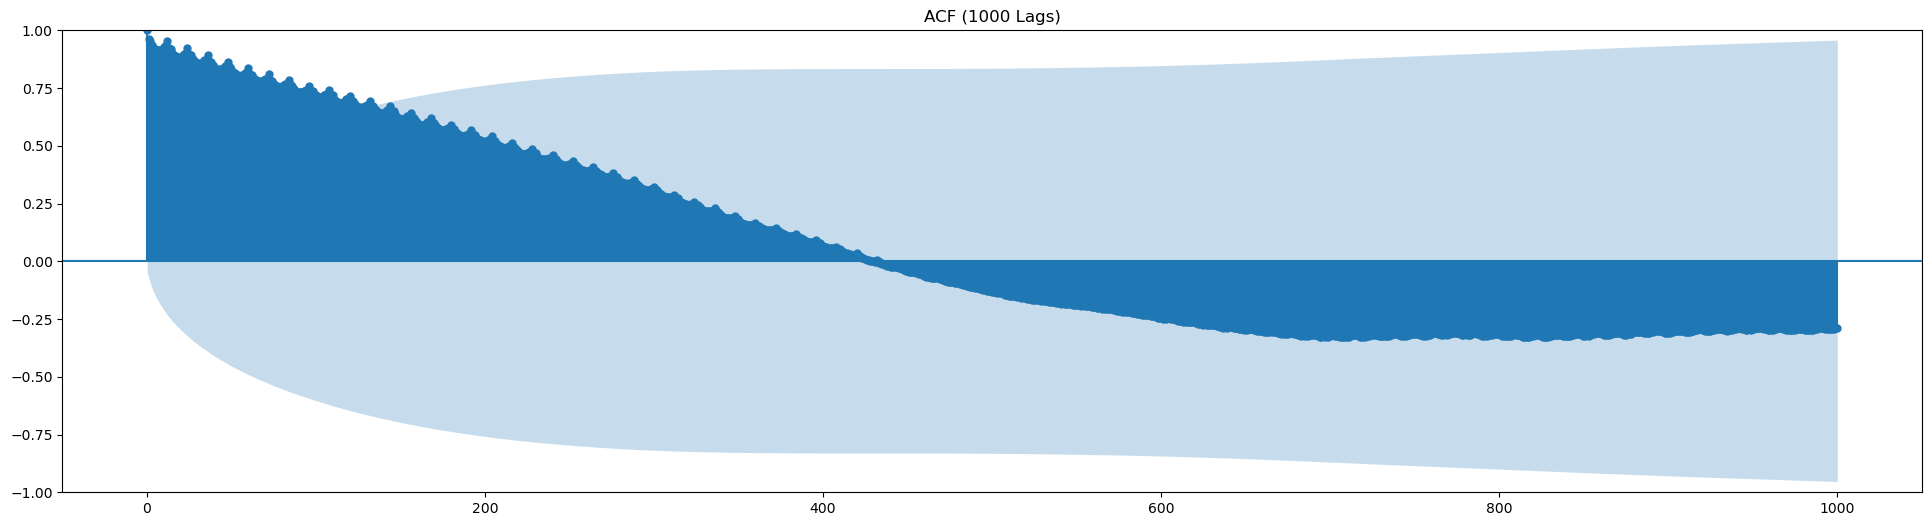

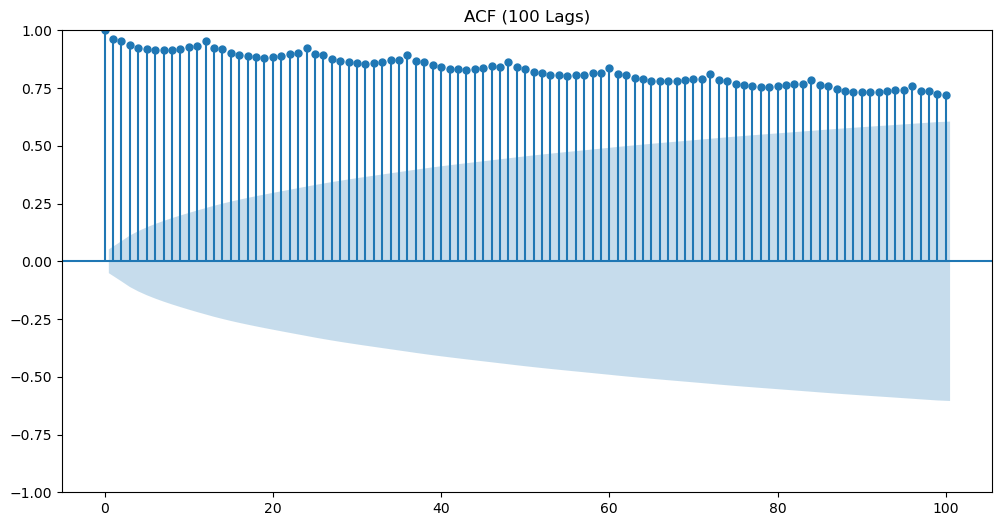

In [6]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(births_data['Births'], label='Births')
plt.title('Série Temporal - Nascimentos em Portugal')
plt.xlabel('Date')
plt.ylabel('Number of Births')
plt.legend()
plt.show()


fig, ax = plt.subplots(figsize=(24, 6))  # Larger figure size for clarity
plot_acf(births_data['Births'], ax=ax, lags=1000)
ax.set_title("ACF (1000 Lags)")
plt.show()

fig, ax = plt.subplots(figsize=(12, 6))  # Standard figure size for fewer lags
plot_acf(births_data['Births'], ax=ax, lags=100)
ax.set_title("ACF (100 Lags)")
plt.show()



Os gráficos ACF indicam que a série temporal possui tanto tendência como elementos de sazonalidade. A tendência é evidenciada pelo declínio gradual nas autocorrelações, enquanto que a sazonalidade é destacada pelos picos em intervalos regulares. 

## 4. Análise de Estacionaridade

Esta seção aborda a importância e as metodologias para determinar a estacionariedade em dados temporais.

### Importância da Estacionaridade
- **Consistência ao Longo do Tempo**: A estacionaridade indica que as propriedades estatísticas da série não mudam ao longo do tempo.
- **Modelação e Previsão**: Muitos modelos de previsão assumem que a série é estacionária. Dados não-estacionários podem levar a previsões imprecisas.

## Verificação da Estacionaridade
- **Análise Visual**: Gráficos de séries temporais podem mostrar indícios de estacionariedade ou não.
- **Testes Estatísticos**: Podem usar-se testes como o Dickey-Fuller aumentado para uma verificação formal da estacionaridade.


In [4]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(births_data['Births'].dropna())

adf_result = {
    'ADF Statistic': adf_test[0],
    'p-value': adf_test[1],
    'Used Lag': adf_test[2],
    'Number of Observations Used': adf_test[3],
    'Critical Values': adf_test[4],
}
adf_result


{'ADF Statistic': 0.1662670456905947,
 'p-value': 0.9703048705330012,
 'Used Lag': 24,
 'Number of Observations Used': 1427,
 'Critical Values': {'1%': -3.4349408214067227,
  '5%': -2.8635675309927153,
  '10%': -2.5678494453155656}}

O valor-p é 0,970. 
Um valor-p alto (tipicamente acima de 0,05) sugere que não devemos rejeitar a hipótese nula de não estacionariedade. Neste caso, o valor-p alto indica que a série temporal provavelmente não é estacionária.

## 5. Decomposição Temporal

A decomposição temporal é uma técnica essencial na análise de séries temporais, permitindo a desagregação dos dados em componentes distintos.

### Significado da Decomposição
- **Desagregação de Padrões**: Separa a série em tendência, sazonalidade e componentes residuais.
- **Melhor Compreensão**: Facilita o entendimento de padrões complexos nos dados temporais.

### Componentes da Decomposição
- **Tendência**: Mostra o movimento de longo prazo na série.
- **Sazonalidade**: Capta padrões que se repetem em intervalos regulares.
- **Resíduos**: Representa a variação aleatória, após a remoção da tendência e sazonalidade.

### Métodos Utilizados
- **Decomposição Clássica**: Utiliza médias móveis para extrair a tendência e a componente sazonal. Isso tende a produzir uma sazonalidade mais suavizada e regular, podendo às vezes perder certas nuances ou variações mais finas na sazonalidade.
- **Decomposição STL**: Emprega a suavização LOESS, que é mais adaptativa e sensível às variações locais nos dados. Assim, a componente sazonal do STL pode mostrar variações mais complexas e detalhadas, capturando melhor as mudanças na sazonalidade ao longo do tempo

**Nota**: A decomposição clássica pode ser adequada para séries temporais com padrões sazonais regulares e consistentes, mas a decomposição STL é preferível para dados com sazonalidade mais complexa e variável. A comparação entre estes dois métodos ajuda a interpretar os dados, auxiliando na escolha do modelo de decomposição mais apropriado para uma análise específica.


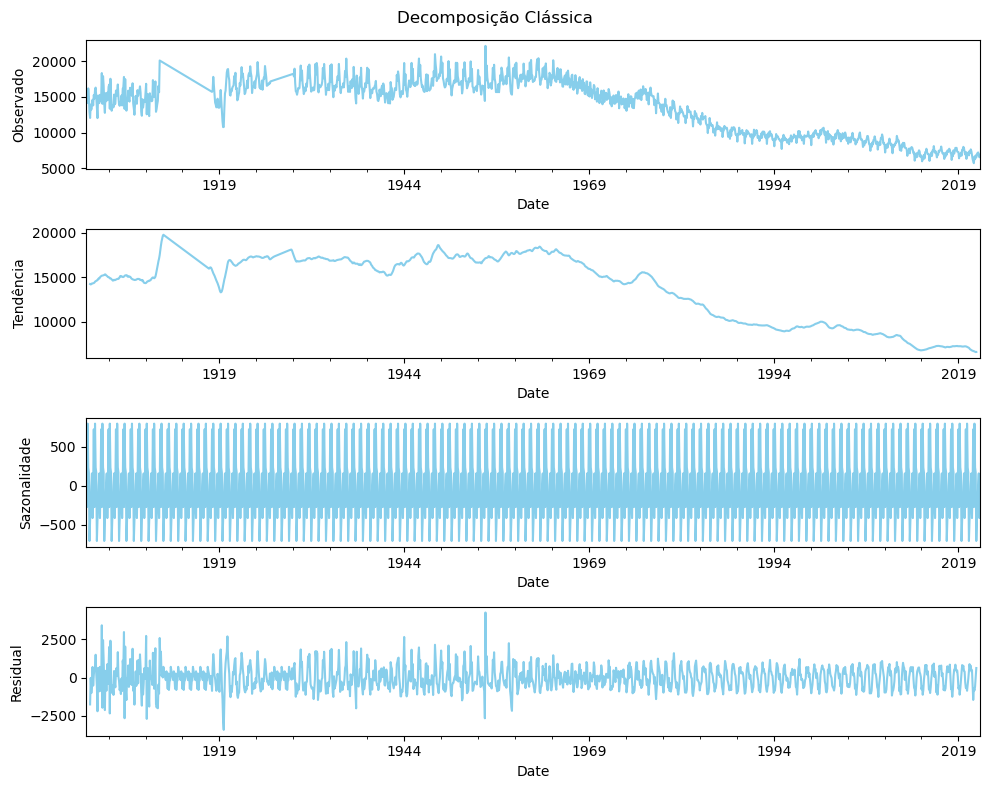

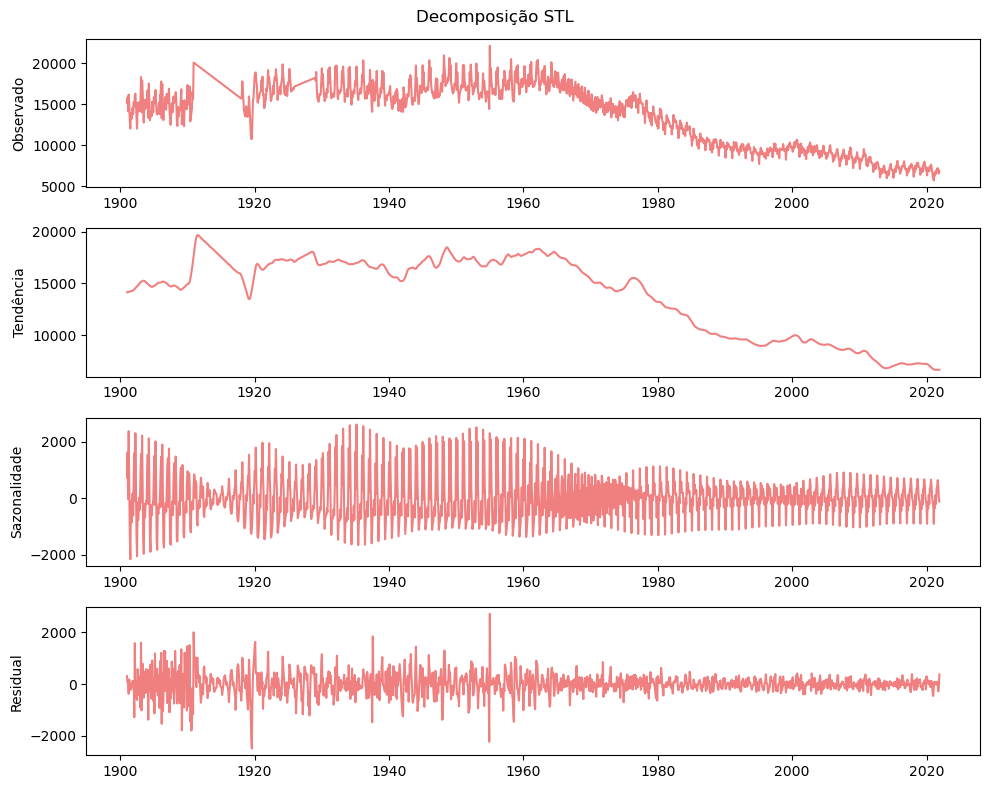

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import matplotlib.pyplot as plt

# Definindo cores específicas para cada decomposição
cor_classica = 'skyblue'  # Cor para a decomposição clássica
cor_stl = 'lightcoral'    # Cor para a decomposição STL

# Decomposição Clássica 
decompose_classical = seasonal_decompose(births_data['Births'], model='additive', period=12)

# Criar e ajustar tamanho do gráfico para a decomposição clássica
fig_classical, axes = plt.subplots(4, 1, figsize=(10, 8))
decompose_classical.observed.plot(ax=axes[0], color=cor_classica, legend=False)
axes[0].set_ylabel('Observado')
decompose_classical.trend.plot(ax=axes[1], color=cor_classica, legend=False)
axes[1].set_ylabel('Tendência')
decompose_classical.seasonal.plot(ax=axes[2], color=cor_classica, legend=False)
axes[2].set_ylabel('Sazonalidade')
decompose_classical.resid.plot(ax=axes[3], color=cor_classica, legend=False)
axes[3].set_ylabel('Residual')
plt.suptitle('Decomposição Clássica')
plt.tight_layout()
plt.show()

# Decomposição STL
stl = STL(births_data['Births'], seasonal=13)
result_stl = stl.fit()

# Criar e ajustar tamanho do gráfico para a decomposição STL
fig_stl, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].plot(result_stl.observed, color=cor_stl)
axes[0].set_ylabel('Observado')
axes[1].plot(result_stl.trend, color=cor_stl)
axes[1].set_ylabel('Tendência')
axes[2].plot(result_stl.seasonal, color=cor_stl)
axes[2].set_ylabel('Sazonalidade')
axes[3].plot(result_stl.resid, color=cor_stl)
axes[3].set_ylabel('Residual')
plt.suptitle('Decomposição STL')
plt.tight_layout()
plt.show()


---
# Conclusão

Este relatório abordou vários aspectos da análise de séries temporais, desde a preparação dos dados e análise descritiva até conceitos mais complexos como visualização, correlogramas, estacionaridade e decomposição temporal. Cada um destes elementos desempenha um papel essencial na interpretação e modelação de dados temporais.

- **Preparação dos Dados**: O alicerce para qualquer análise eficaz, garantia de que os dados são limpos, formatados corretamente e estão prontos para a análise.
- **Análise Descritiva**: Fornece uma visão e compreensão  inicial dos dados, que permite fundamentar análises mais profundas.
- **Visualizações e Correlogramas**: Ajuda a identificar padrões, tendências e dependências nos dados.
- **Análise de Estacionaridade**: Serve para validar os métodos de modelação e assegurar previsões confiáveis.
- **Decomposição Temporal**: Expõe várias dimensões dos série temporal, como a tendência e a sazonalidade.

Ao combinar estas técnicas, aumentamos a nossa capacidade de interpretar séries temporais, conseguindo modelá-las de forma mais precisa e fundamentada. Este conhecimento não só melhora o nível da nossa análise estatística, como fortalece as bases para uma tomada de decisão informada.
